In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics, model_selection
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC, LinearSVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
Data = pd.read_csv('export_dataframe.csv')

Transformar dataframe a division de train y test.

In [0]:
Data = Data.sample(frac=1, random_state=420)

X = Data.iloc[:, 0:72]
y = Data.iloc[:, 72]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=420, stratify=y)

Definiciones para correr clasificador, de forma de validar utilizando varios test. También se incluye la forma de plotear la matriz de confusion.

In [0]:
def run_classifier(clf, name, X_train, X_test, y_train, y_test, num_tests=100):
    metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}
    
    for n in range(num_tests):
        clf.fit(X_train, y_train)    ## Entrenamos con X_train y clases y_train
        predictions = clf.predict(X_test)
        metrics['y_pred'] = predictions
        #metrics['y_prob'] = clf.predict_proba(X_test)[:,1]
        metrics['Accuracy'].append(accuracy_score(y_test, predictions))
        metrics['Precision'].append(precision_score(y_test, predictions, average="macro"))
        metrics['Recall'].append(recall_score(y_test, predictions, average="macro"))
        metrics['F1-Score'].append(f1_score(y_test, predictions, average="macro"))
        
        if n == 0:
            plot_confusion_matrix(y_test, predictions, classes=["cyl", "hook", "lat", "palm", "spher", "tip"], title='Confusion matrix ' + name)
            
    return metrics

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred) 
    
    # Only use the labels that appear in the data
   
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

----------------
Resultados para clasificador:  Base Dummy
Accuracy promedio: 0.17203703703703704
Precision promedio: 0.17218616485592264
Recall promedio: 0.17203703703703702
F1-Score promedio: 0.17190675420771176
----------------


----------------
Resultados para clasificador:  Decision Tree
Accuracy promedio: 0.7640740740740741
Precision promedio: 0.7651789000089373
Recall promedio: 0.7640740740740741
F1-Score promedio: 0.7636686738701238
----------------


----------------
Resultados para clasificador:  Gaussian Naive Bayes
Accuracy promedio: 0.4583333333333333
Precision promedio: 0.5309918664838998
Recall promedio: 0.4583333333333333
F1-Score promedio: 0.44957627573901104
----------------


----------------
Resultados para clasificador:  KNN
Accuracy promedio: 0.7194444444444443
Precision promedio: 0.72755435222874
Recall promedio: 0.7194444444444443
F1-Score promedio: 0.7197921727464458
----------------


----------------
Resultados para clasificador:  Support Vector Machine
Accu

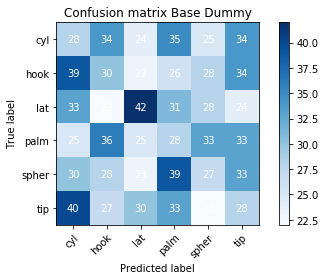

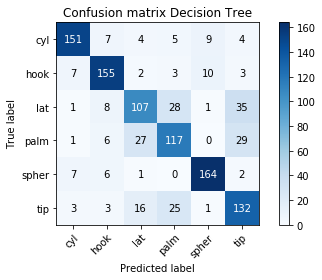

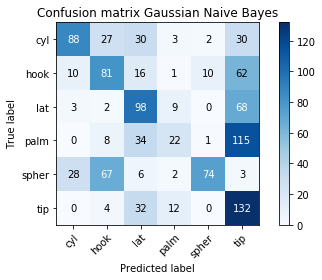

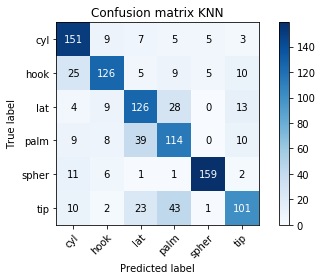

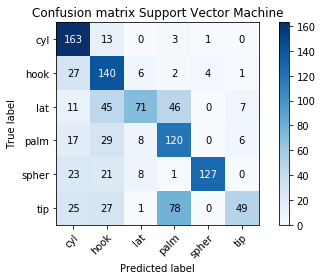

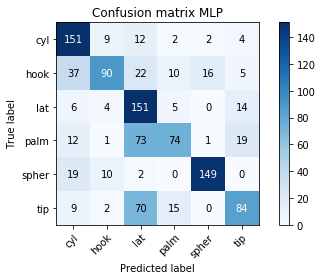

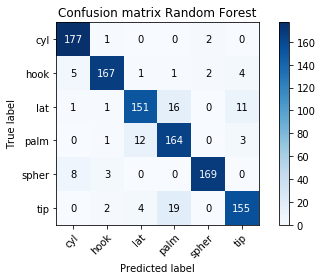

In [0]:
import warnings
warnings.filterwarnings('ignore')


c0 = ("Base Dummy", DummyClassifier(strategy='stratified'))
c1 = ("Decision Tree", DecisionTreeClassifier())
c2 = ("Gaussian Naive Bayes", GaussianNB())
c3 = ("KNN", KNeighborsClassifier(n_neighbors=5))
#c4 = ("Support Vector Machine", SVC(kernel='linear', gamma='auto'))
c4 = ("Support Vector Machine", LinearSVC(max_iter=3000))
c5 = ("MLP", MLPClassifier())
c6 = ("Random Forest", RandomForestClassifier(n_estimators=100))

classifiers = [c0,c1, c2, c3, c4, c5, c6]

results = {}
for name, clf in classifiers:
    metrics = run_classifier(clf, name, X_train, X_test, y_train, y_test, 10) 
    results[name] = metrics
    print("----------------")
    print("Resultados para clasificador: ",name) 
    print("Accuracy promedio:",np.array(metrics['Accuracy']).mean())
    print("Precision promedio:",np.array(metrics['Precision']).mean())
    print("Recall promedio:",np.array(metrics['Recall']).mean())
    print("F1-Score promedio:",np.array(metrics['F1-Score']).mean())
    print("----------------\n\n")

Matriz de correlación

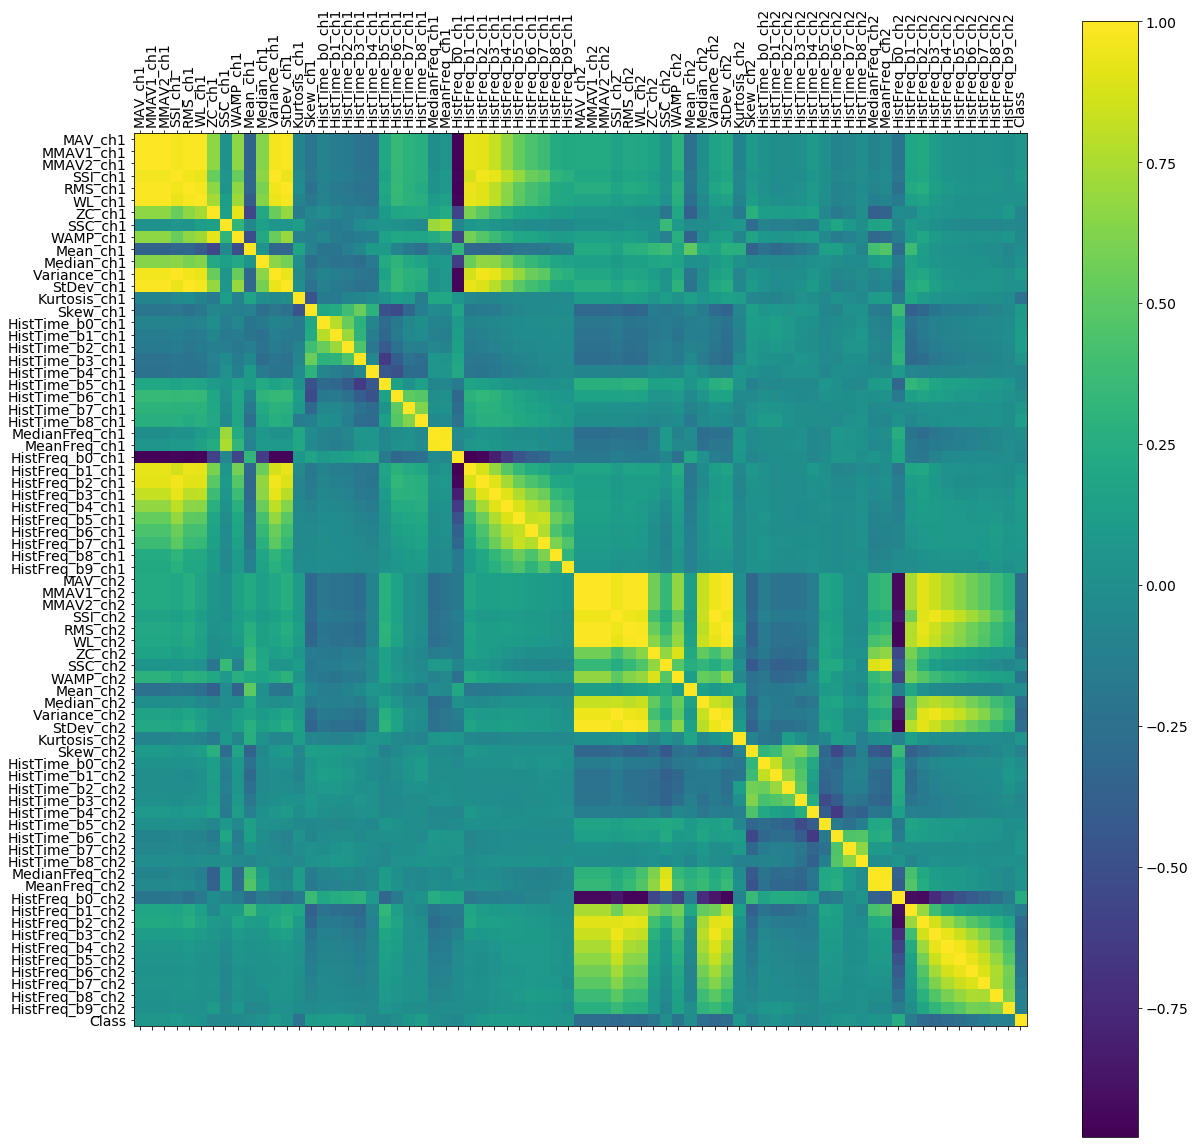

In [10]:
f = plt.figure(figsize=(20, 20))
plt.matshow(Data.corr(), fignum=f.number)
plt.xticks(range(Data.shape[1]), Data.columns, fontsize=14, rotation=90)
plt.yticks(range(Data.shape[1]), Data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)